In [1]:
from htc_class_testing import HolsteinTavisCummings
import numpy as np
from qutip import *
from qutip.core.gates import *
from numpy import array
from numpy import real
import matplotlib.pyplot as plt
pi = np.pi
hf_params = {
    'w_q1': 0.8365513706206968,         # Qubit 1 frequency (e.g., in GHz)
    'w_q2': 0.8365513706206968,         # Qubit 2 frequency
    'w_vib1': 0.018335911729858174,       # Vibrational mode 1 frequency
    'w_vib2': 0.018335911729858174,      # Vibrational mode 2 frequency
    'w_cav': 5 * np.pi,        # Cavity frequency
    'S_1': 1.0,         # Huang-Rhys factor for qubit 1 and vib 1
    'S_2': 1.0,         # Huang-Rhys factor for qubit 2 and vib 2
    'lambda_1': 0.026919208248238624,     # Cavity coupling strength for qubit 1
    'lambda_2': 0.026919208248238624,    # Cavity coupling strength for qubit 2
    'N_vib': 2,         # Number of vibrational states to include
    'N_cav': 2,          # Cavity truncation level
    #'sigma_z_Hq' : True, # formulate qubit Hamiltonians as -w / 2 * sigma_z
    'include_cavity': True,
    'qubit_1_dipole_moments' : 
    { 
        'mu_g': -0.7275466054308762, #ground dipole moment
        'mu_e': 0.7751862316027126, #excited dipole moment
        'mu_eg': 0.8142093557243336 #transition dipole moment
    },
    'qubit_2_dipole_moments' : 
    { 
        'mu_g': -0.7275466054308762, #ground dipole moment
        'mu_e': 0.7751862316027126, #excited dipole moment
        'mu_eg': 0.8142093557243336 #transition dipole moment
    }
}

# using the same paramters as the tutorial for now!
tutorial_params = {

    'w_q1': 3 * 2 * np.pi,         # Qubit 1 frequency (e.g., in GHz)
    'w_q2': 2 * 2 * np.pi,         # Qubit 2 frequency
    'w_vib1': 0.1 * 2 * np.pi, #18335911729858174,       # Vibrational mode 1 frequency
    'w_vib2': 0.1 * 2 * np.pi, #18335911729858174,      # Vibrational mode 2 frequency
    'w_cav': 5 * 2 * np.pi,        # Cavity frequency
    'S_1': 1.0,         # Huang-Rhys factor for qubit 1 and vib 1
    'S_2': 1.,         # Huang-Rhys factor for qubit 2 and vib 2
    'lambda_1': 0.02,     # Cavity coupling strength for qubit 1
    'lambda_2': 0.02,    # Cavity coupling strength for qubit 2
    'N_vib': 2,         # Number of vibrational states to include
    'N_cav': 2,          # Cavity truncation level
    'simple_g' : True,
    'sigma_z_Hq' : True, # formulate qubit Hamiltonians as -w / 2 * sigma_z
    # 'g1' : 0.01 * 2 * np.pi,
    # 'g2' : 0.0125 * 2 * np.pi,
    'g1' : 0.01 * 2 * np.pi,
    'g2' : 0.01 * 2 * np.pi,
    'include_cavity': True
}


# Example parameters
system = HolsteinTavisCummings( hf_params )
g1 = system.g1
g2 = system.g2


tlist = np.linspace(0, 220, 500)

width = 0.5

# resonant SQRT iSWAP gate
# T0_1 = 20
# T_gate_1 = (1*pi)/(4 * g1)

# # resonant iSWAP gate
# T0_2 = 60
# T_gate_2 = (2 *pi)/(4 * g2)


In [2]:
system.build_hamiltonian()
g1 = system._g1
g2 = system._g2

# resonant SQRT iSWAP gate
T0_1 = 20
T_gate_1 = (1*pi)/(4 * g1)

# resonant iSWAP gate
T0_2 = 100
T_gate_2 = (2 *pi)/(4 * g2)

# the following attributes store the different contributions to the Hamiltonian (all on the full Hilbert space)
### Bare Hamiltonians
# .H_q1 -> qubit 1 Hamiltonian
# .H_q2 -> qubit 2 Hamiltonian
# .H_qubit -> qubit 1 + qubit 2 Hamiltonian 
# .H_vib1 -> vibrational Hamiltonian for qubit 1
# .H_vib2 -> vibrational Hamiltonian for qubit 2
# .H_vibrational -> vibrational Hamiltonians for qubit 1 + qubit 2
# .H_cav -> cavity Hamiltonian

# Coupling Hamiltonians
# Note on qubit - cavity coupling - several flavors available:
#  a. Tavis-Cummings (parameterized by `g1` and `g2` or by `sqrt(w1/2) * lambda * mu1_{eg}` and  `sqrt(w2/2) * lambda * mu2_{eg}`  
#  b. Pauli-Fierz (sqrt(w1/2) * lambda * mu1, sqrt(w2/2) * lambda * mu2 using full operators)
#  c. If Pauli-Fierz, may also include dipole self energy if requested

# .H_q1_cav -> coupling between qubit 1 and cavity
# .H_q2_cav -> coupling between qubit 2 and cavity
# .H_qubit_cavity_coupling -> coupling between qubits 1 and 2 and cavity

# .H_q1_vib1 -> vibronic coupling for qubit 1
# .H_q2_vib2 -> vibronic coupling for qubit 2
# .H_qubit_vibrational_coupling -> vibronic couplings for qubit 1 and qubit 2

Using Tavis-Cummings coupling
Using g coupling with TDM


In [3]:
wc = system.w_cav
w1 = system.w_q1
w2 = system.w_q2
def step_t(w1, w2, t0, width, t):
    """
    Step function that goes from w1 to w2 at time t0
    as a function of t. 
    """
    return w1 + (w2 - w1) * (t > t0)
    #return w1 + (w2 - w1) * (0 > np.sin(t * pi/t0))

def wc_t(t, args=None):
    return wc

def w1_t(t, args=None):
    return w1 + step_t(0.0, wc-w1, T0_1, width, t) - step_t(0.0, wc-w1, T0_1+T_gate_1, width, t)
    #return step_t(w1,wc,T_gate_1,width,t)

def w2_t(t, args=None):
    return w2 + step_t(0.0, wc-w2, T0_2, width, t) - step_t(0.0, wc-w2, T0_2+T_gate_2, width, t)
    #return step_t(w2,wc,T_gate_2,width,t)

def time_dependent_polaron_basis(t, args=None):
    return system.build_polaron_basis_t(t, T0_1, T_gate_1, T0_2, T_gate_2)

In [4]:
def step_t(w1, w2, t0, t):
    """
    Step function that goes from w1 to w2 at time t0
    as a function of t. 
    """
    return w1 + (w2 - w1) * (t > t0)

def w1_t(t, args=None):
    return system.w_q1 + system.step_t(0.0, system.w_cav-system.w_q1, T0_1, t) - system.step_t(0.0, system.w_cav-system.w_q1, T0_1+T_gate_1, t)

def w2_t(t, args=None):
    return system.w_q2 + system.step_t(0.0, system.w_cav-system.w_q2, T0_2, t) - system.step_t(0.0, system.w_cav-system.w_q2, T0_2+T_gate_2, t)

$H(t) = (w1 + \text{pulse for qubit 1}) \cdot (-0.5 \cdot sz1) + (w2 + \text{pulse for qubit 2}) \cdot (-0.5 \cdot sz2) + wc \cdot (a^{\dagger} a) + g1 (a^{\dagger} sm1 + a sm1^{\dagger}) + g2 (a^{\dagger} sm2 + a sm2^{\dagger})$

In [5]:
H_t = [time_dependent_polaron_basis]

In [6]:
# initial state: start with one of the qubits in its excited state - note we need to reorder basis
# the qutip had cavity basis first, we have it last 
# qutip tutorial: psi0 = tensor(basis(N,0),basis(2,1),basis(2,0))
# equivalent in our basis: psi0 = tensor(basis(2,1), basis(2,0))
psi = tensor(basis(2,1), basis(2,0),basis(system.N_vib,0),basis(system.N_vib,0), basis(system.N_cav,0))
# psi0 = H_vectors.dag() * psi
# psi0 = Qobj(H_vectors[16,:].real, dims=psi.dims)
psi0 = system.H_vecs.dag() * psi

In [7]:
psi0

Quantum object: dims=[[2, 2, 2, 2, 2], [1]], shape=(32, 1), type='ket', dtype=Dense
Qobj data =
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.85065081]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.52573111]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]

In [8]:
res = mesolve(H_t, psi0, tlist, [], e_ops=[])

In [9]:
#res.states

In [10]:
#qubit cavity coupling
# first build the individual coupling terms
_qubit_excitation = system.sp * system.sm
_vib_excitation = system.ap + system.a

# qubit 1 coupling constant is squared Huang-Rhys factor
_lambda_1 = np.sqrt(system.S_1) 
_lambda_2 = np.sqrt(system.S_2)

# these operators need to be defined for the plot below

nv_i = system.ap * system.a + system.vibrational_zero_point

# cavity operators on the full Hilbert space
a = tensor( qeye(2), qeye(2), qeye(system.N_vib), qeye(system.N_vib), destroy(system.N_cav) )
n_ = a.dag() * a

# operators for qubit 1
sm1 = tensor( destroy(2), qeye(2), qeye(system.N_vib), qeye(system.N_vib), qeye(system.N_cav) ) 
sz1 = tensor(sigmaz(), qeye(2), qeye(system.N_vib), qeye(system.N_vib), qeye(system.N_cav))
nv1 = tensor(qeye(2), qeye(2), nv_i, qeye(system.N_vib), qeye(system.N_cav))
# nqv1 = - _lambda_1 * tensor(_qubit_excitation, qeye(2), _vib_excitation, qeye(system.N_vib), qeye(system.N_cav))
nqv1 = - tensor(_qubit_excitation, qeye(2), _vib_excitation, qeye(system.N_vib), qeye(system.N_cav))
nq1 = sm1.dag() * sm1
# nq1 = -0.5 * sz1
n1_ = nq1 + nqv1 + nv1

# oeprators for qubit 2
sm2 = tensor(qeye(2), destroy(2), qeye(system.N_vib), qeye(system.N_vib), qeye(system.N_cav))
sz2 = tensor(qeye(2), sigmaz(), qeye(system.N_vib),qeye(system.N_vib), qeye(system.N_cav) )
nv2 = tensor(qeye(2), qeye(2), qeye(system.N_vib), nv_i, qeye(system.N_cav))
# nqv2 = - _lambda_2 * tensor(qeye(2), _qubit_excitation, qeye(system.N_vib), _vib_excitation, qeye(system.N_cav))
nqv2 = - tensor(qeye(2), _qubit_excitation, qeye(system.N_vib), _vib_excitation, qeye(system.N_cav))
nq2 = sm2.dag() * sm2
# nq2 = -0.5 * sz2
n2_ = nq2 + nqv2 + nv2

In [11]:
n = []
n1 = []
n2 = []
n11 = []
n12 = []
n1n = []

i = 0

while i < len(res.states):
    H_vecs = system.H_vecs
    res_i = res.states[i]
    
    n_0 = n_
    n1_0 = nq1
    n2_0 = nq2

    # n1_0 = n1_
    # n2_0 = n2_
    
    n_1 = H_vecs.dag() * n_ * H_vecs
    n1_1 = H_vecs.dag() * nq1 * H_vecs
    n2_1 = H_vecs.dag() * nq2 * H_vecs

    # n1_1 = nq1
    # n2_1 = nq2

    n0 = real(expect(n_0, res_i))
    n01 = real(expect(n1_0, res_i))
    n02 = real(expect(n2_0, res_i))

    n0n = real(expect(n_1, res_i))
    n011 = real(expect(n1_1, res_i))
    n012 = real(expect(n2_1, res_i))

    n.append(n0)
    n1.append(n01)
    n2.append(n02)
    n1n.append(n0n)
    n11.append(n011)
    n12.append(n012)

    i += 1


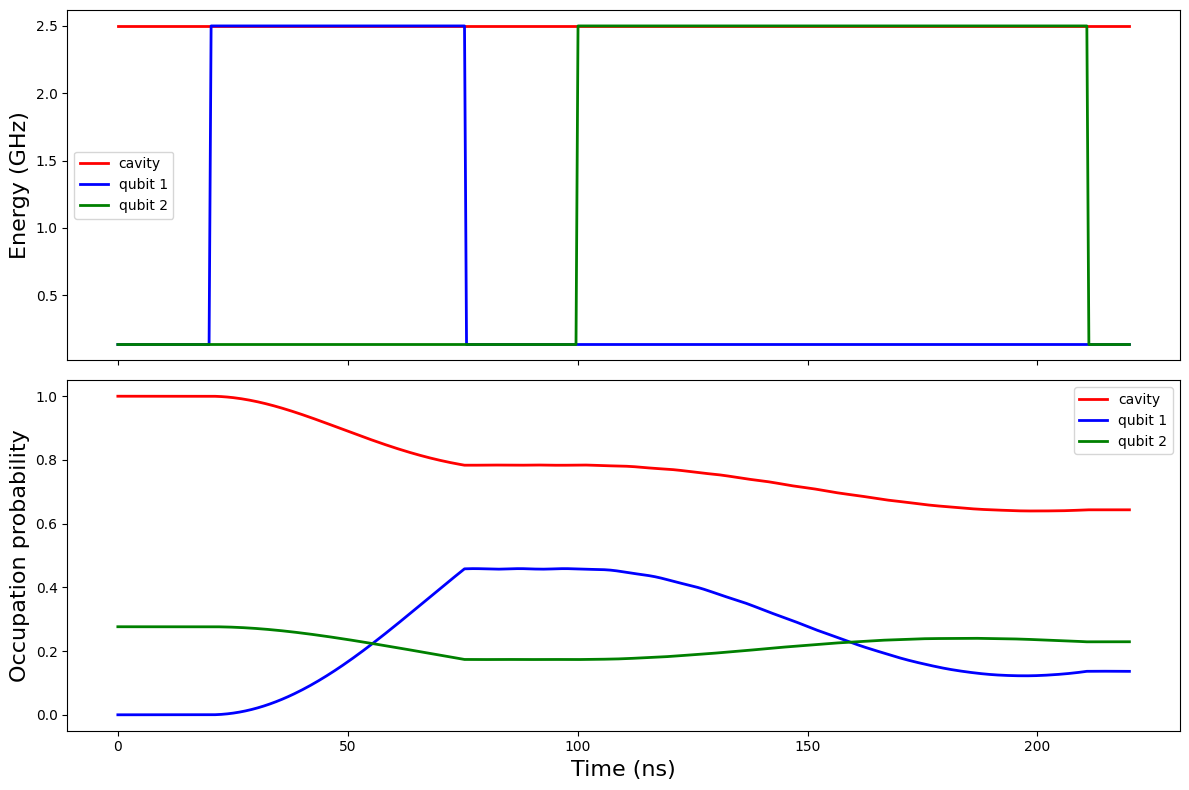

In [12]:
#plot
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12,8))

axes[0].plot(tlist, array(list(map(wc_t, tlist))) / (2*pi), 'r', linewidth=2, label="cavity")
axes[0].plot(tlist, array(list(map(w1_t, tlist))) / (2*pi), 'b', linewidth=2, label="qubit 1")
axes[0].plot(tlist, array(list(map(w2_t, tlist))) / (2*pi), 'g', linewidth=2, label="qubit 2")
#axes[0].set_ylim(1, 6)
axes[0].set_ylabel("Energy (GHz)", fontsize=16)
axes[0].legend()

axes[1].plot(tlist, n, 'r', linewidth=2, label="cavity")
axes[1].plot(tlist, n1, 'b', linewidth=2, label="qubit 1")
axes[1].plot(tlist, n2, 'g', linewidth=2, label="qubit 2")
#axes[1].set_ylim(0, 1)

axes[1].set_xlabel("Time (ns)", fontsize=16)
axes[1].set_ylabel("Occupation probability", fontsize=16)
axes[1].legend()

fig.tight_layout()

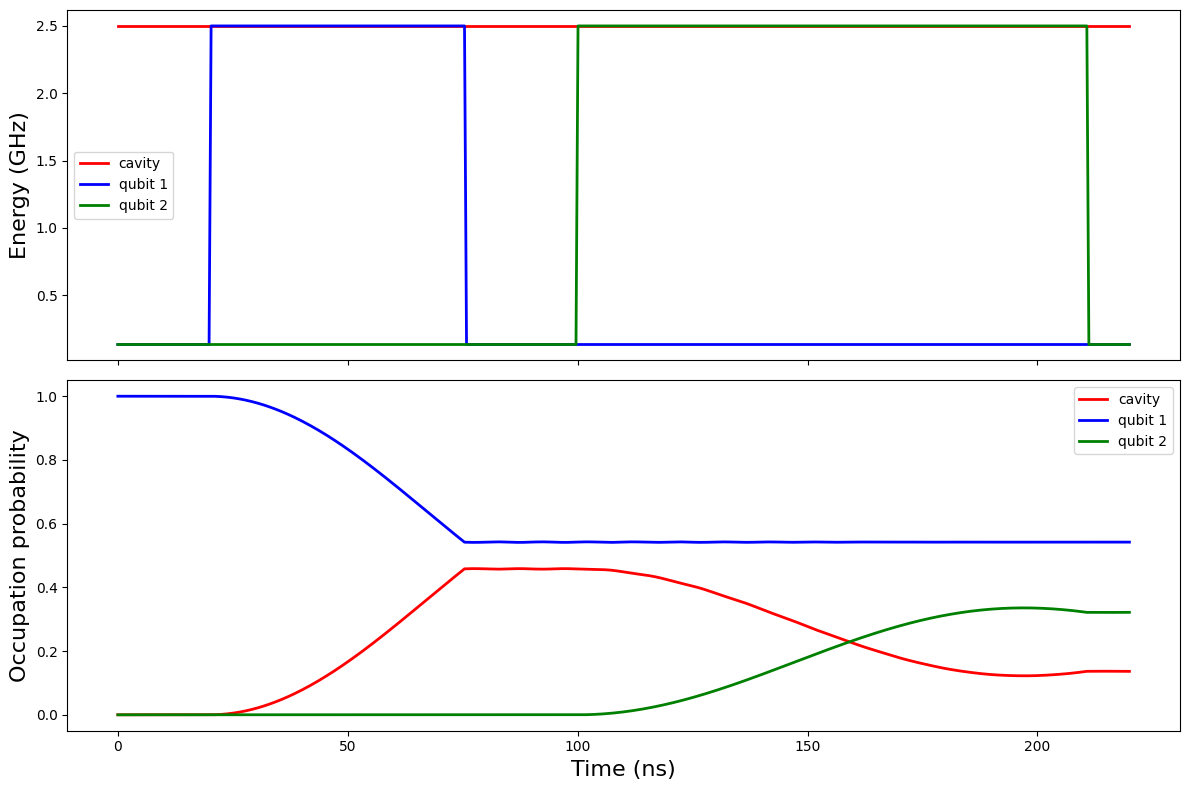

In [13]:
#plot
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12,8))

axes[0].plot(tlist, array(list(map(wc_t, tlist))) / (2*pi), 'r', linewidth=2, label="cavity")
axes[0].plot(tlist, array(list(map(w1_t, tlist))) / (2*pi), 'b', linewidth=2, label="qubit 1")
axes[0].plot(tlist, array(list(map(w2_t, tlist))) / (2*pi), 'g', linewidth=2, label="qubit 2")
#axes[0].set_ylim(1, 6)
axes[0].set_ylabel("Energy (GHz)", fontsize=16)
axes[0].legend()

axes[1].plot(tlist, n1n, 'r', linewidth=2, label="cavity")
axes[1].plot(tlist, n11, 'b', linewidth=2, label="qubit 1")
axes[1].plot(tlist, n12, 'g', linewidth=2, label="qubit 2")
#axes[1].set_ylim(0, 1)

axes[1].set_xlabel("Time (ns)", fontsize=16)
axes[1].set_ylabel("Occupation probability", fontsize=16)
axes[1].legend()

fig.tight_layout()

In [14]:
lab_states = []
lab_n_list = []
lab_n1_list = []
lab_n2_list = []

i = 0

while i < len(res.states):
    H_vec = system.H_vecs
    state = res.states[i]

    lab_state = H_vec * state
    # lab_state = state

    lab_n_list.append(real(expect(n_, lab_state)))
    lab_n1_list.append(real(expect(nq1, lab_state)))
    lab_n2_list.append(real(expect(nq2, lab_state)))

    i += 1

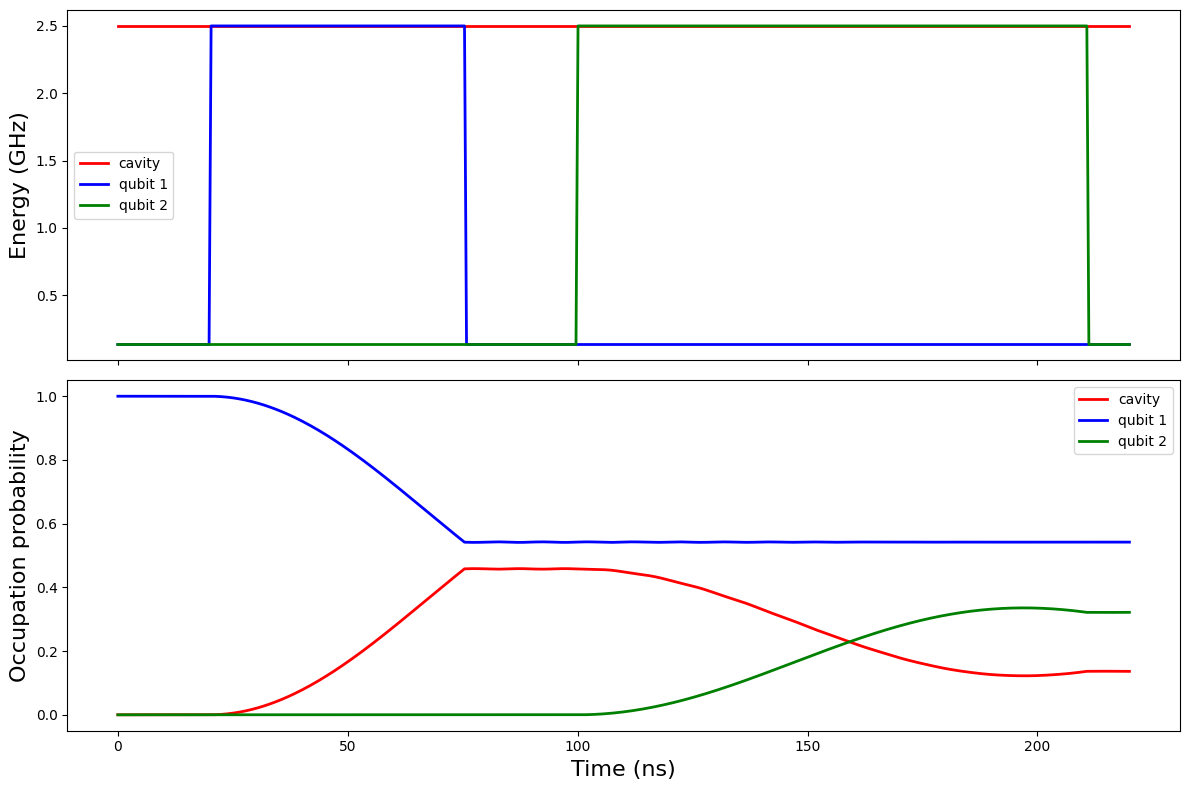

In [15]:
#plot
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12,8))

axes[0].plot(tlist, array(list(map(wc_t, tlist))) / (2*pi), 'r', linewidth=2, label="cavity")
axes[0].plot(tlist, array(list(map(w1_t, tlist))) / (2*pi), 'b', linewidth=2, label="qubit 1")
axes[0].plot(tlist, array(list(map(w2_t, tlist))) / (2*pi), 'g', linewidth=2, label="qubit 2")
#axes[0].set_ylim(1, 6)
axes[0].set_ylabel("Energy (GHz)", fontsize=16)
axes[0].legend()

axes[1].plot(tlist, lab_n_list, 'r', linewidth=2, label="cavity")
axes[1].plot(tlist, lab_n1_list, 'b', linewidth=2, label="qubit 1")
axes[1].plot(tlist, lab_n2_list, 'g', linewidth=2, label="qubit 2")
#axes[1].set_ylim(0, 1)

axes[1].set_xlabel("Time (ns)", fontsize=16)
axes[1].set_ylabel("Occupation probability", fontsize=16)
axes[1].legend()


fig.tight_layout()

In [16]:
rho_final = res.states[-1]
rho_final

Quantum object: dims=[[2, 2, 2, 2, 2], [1]], shape=(32, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [-3.07890604e-02-3.52930215e-01j]
 [ 6.05190890e-01-4.77096280e-02j]
 [-2.87383240e-01+2.40289476e-01j]
 [-1.10338066e-04-7.31698790e-05j]
 [-6.88646349e-02+1.47031582e-01j]
 [-4.13300524e-01-5.16440078e-02j]
 [-8.13175610e-05+2.35981129e-04j]
 [-1.68977955e-01+2.92638564e-02j]
 [-2.93980401e-10-4.77835812e-08j]
 [ 6.24955023e-08-4.96778232e-08j]
 [ 5.39149681e-09+1.15891840e-08j]
 [ 1.23799919e-07+9.35607619e-08j]
 [ 1.18785978e-01+4.64716967e-02j]
 [-3.23313584e-02-1.31064302e-01j]
 [-9.61556885e-02-1.97157746e-01j]
 [-1.12656793e-01+2.02670476e-01j]
 [-4.92777048e-08+1.11751167e-08j]
 [-3.75994015e-11+3.54690829e-11j]
 [ 1.34700394e-11-3.53923644e-11j]
 [ 1.11865642e-08+3.51870861e-09j]
 [-1.72461206e-11-7.74979034e-11j]
 [-3.10542169e-08-3.80902171e

In [17]:
# trace out the resonator mode and print the two-qubit density matrix
rho_qubits = ptrace(rho_final, [0,1])

In [18]:
rho_qubits_ideal1 = ket2dm(tensor(phasegate(0), phasegate(pi/2)) * sqrtiswap() * tensor(basis(2,1), basis(2,0)))
rho_qubits_ideal2 = ket2dm(tensor(phasegate(0), phasegate(-pi/2)) * sqrtiswap() * tensor(basis(2,1), basis(2,0)))

In [19]:
fidelity(rho_qubits, rho_qubits_ideal1)

np.float64(0.37296556689894866)

In [20]:
fidelity(rho_qubits, rho_qubits_ideal2)

np.float64(0.4759501965425901)

In [21]:
concurrence(rho_qubits)

np.float64(0.08744437848151379)

In [22]:
# rho_q_cav = ptrace(rho_final, [0,4])
# fid1 = fidelity(rho_q_cav, rho

In [23]:
# test = system.H_cav.eigenenergies().tolist()
# test.sort()
# test

In [24]:
system.vecs[16]

Quantum object: dims=[[2, 2, 2, 2, 2], [1]], shape=(32, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]